# Mini Project 2

- a) Perform EDA on the data
- b) Select the outcome/ response variable
- c) Select features
- d) Select approaches/ models
- e) Apply the models and evaluate them

Due Date: Monday 19 July 2021

**Source:** Department of Industry, Science, Energy and Resources

**Goal:** To predict Australia `Total Energy Consumption` and `Energy Consumption per Industry` by `Population` and `GDP` with different machine learning algorithm
> Linear Regression <br>
> Ridge Regression <br>
> SVM

**Units:**
- Population (Number)
- GDP (Million Dollars)
- Total / Individual Energy Consumption (PJ)

## Load library and data

In [1]:
# Import library
import numpy as np
import pandas as pd

from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LinearRegression, RidgeCV
from sklearn.svm import SVR

import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns

In [2]:
# Load dataset
path1 = "pop_gdp_consumption.xlsx"
path2 = "consumption_by_industry.xlsx"
path3 = "pop_city_rural.xlsx"
df1 = pd.read_excel(path1, sheet_name="AUS", usecols=["Population", "GDP"])
df2 = pd.read_excel(path2, sheet_name="AUS", usecols="B:L")
df3 = pd.read_excel(path3, sheet_name="Data")

# Compbine the dataframes
df = pd.concat([df1, df2, df3], axis = 1)

## EDA

In [3]:
df.head()

,Population,GDP,Agriculture,Mining,Manufacturing,Electricity generation,Construction,Transport,Water and waste b,Commercial and services c,Residential,Other d,Total,Year,Population in largest city,Rural population
0,16814416,770511,58.5,129.3,1041.0,1047.6,41.5,1004.9,5.4,136.7,301.5,66.4,3832.7,1989,3591200.0,2444309
1,17065128,798023,55.1,159.9,1067.4,1066.0,41.0,1012.4,5.4,145.5,322.3,70.8,3945.9,1990,3631940.0,2485873
2,17284036,794853,55.8,164.6,1073.9,1065.0,37.2,1003.0,5.7,151.1,327.8,65.8,3949.9,1991,3673110.0,2522945
3,17478635,798132,57.0,176.2,1033.9,1092.9,35.9,1024.3,5.7,154.2,334.6,68.0,3982.7,1992,3709165.0,2574389
4,17634808,830292,59.1,189.3,1066.6,1096.4,34.6,1049.6,5.5,158.8,347.1,74.8,4081.8,1993,3745472.0,2622313


In [4]:
df.tail()

,Population,GDP,Agriculture,Mining,Manufacturing,Electricity generation,Construction,Transport,Water and waste b,Commercial and services c,Residential,Other d,Total,Year,Population in largest city,Rural population
26,23815995,1708151,104.540,521.228,1112.796,1670.889,25.567,1615.859,14.214,320.304,456.244,55.689,5897.331,2015,4544293.0,3405449
27,24190907,1755478,109.756,575.617,1110.199,1718.262,24.358,1645.504,14.471,322.672,460.903,59.034,6040.777,2016,4625496.0,3435109
28,24601860,1797041,116.296,666.337,1080.088,1681.994,24.227,1691.357,14.441,330.144,458.490,51.191,6114.566,2017,4708150.0,3467878
29,24982688,1849880,117.570,729.741,1079.715,1621.595,25.908,1720.935,15.155,333.921,458.396,56.195,6159.132,2018,4792281.0,3494578
30,25357553,1884969,103.119,812.435,1050.208,1591.703,24.310,1748.411,16.493,332.581,460.866,55.841,6195.967,2019,4870388.0,3519751


In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 31 entries, 0 to 30
Data columns (total 16 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   Population                  31 non-null     int64  
 1   GDP                         31 non-null     int64  
 2   Agriculture                 31 non-null     float64
 3   Mining                      31 non-null     float64
 4   Manufacturing               31 non-null     float64
 5   Electricity generation      31 non-null     float64
 6   Construction                31 non-null     float64
 7   Transport                   31 non-null     float64
 8   Water and waste b           31 non-null     float64
 9   Commercial and services c   31 non-null     float64
 10  Residential                 31 non-null     float64
 11  Other d                     31 non-null     float64
 12  Total                       31 non-null     float64
 13  Year                        31 non-nu

In [6]:
df.describe()

,Population,GDP,Agriculture,Mining,Manufacturing,Electricity generation,Construction,Transport,Water and waste b,Commercial and services c,Residential,Other d,Total,Year,Population in largest city,Rural population
count,3.100000e+01,3.100000e+01,31.000000,31.000000,31.000000,31.000000,31.000000,31.000000,31.000000,31.000000,31.000000,31.000000,31.000000,31.000000,3.100000e+01,3.100000e+01
mean,2.047295e+07,1.271391e+06,85.032871,346.772516,1156.612677,1491.384000,29.024839,1346.756935,10.149613,240.428806,404.135839,73.649161,5183.944097,2004.000000,4.039837e+06,3.058985e+06
std,2.593981e+06,3.561612e+05,19.785008,173.857966,75.267172,269.507278,4.778484,229.723925,3.754679,63.188574,47.925762,12.223600,776.816576,9.092121,3.684107e+05,3.217247e+05
min,1.681442e+07,7.705110e+05,55.100000,129.300000,1033.900000,1047.600000,24.227000,1003.000000,5.400000,136.700000,301.500000,51.191000,3832.700000,1989.000000,3.591200e+06,2.444309e+06
25%,1.832390e+07,9.497190e+05,64.450000,242.750000,1094.544000,1227.950000,25.454500,1192.250000,6.250000,186.600000,372.350000,65.998500,4558.300000,1996.500000,3.785616e+06,2.817134e+06
50%,1.993272e+07,1.256117e+06,94.153000,272.500000,1163.688000,1584.696000,27.706000,1327.831000,10.381000,255.899000,411.604000,73.719000,5284.727000,2004.000000,3.856593e+06,3.127194e+06
75%,2.253674e+07,1.559170e+06,98.755000,427.781000,1207.437000,1698.133500,30.700000,1536.016000,13.515500,288.791500,450.558000,80.691000,5889.614000,2011.500000,4.271732e+06,3.301308e+06
max,2.535755e+07,1.884969e+06,117.570000,812.435000,1330.246000,1920.660000,41.500000,1748.411000,16.493000,333.921000,460.903000,102.000000,6195.967000,2019.000000,4.870388e+06,3.519751e+06


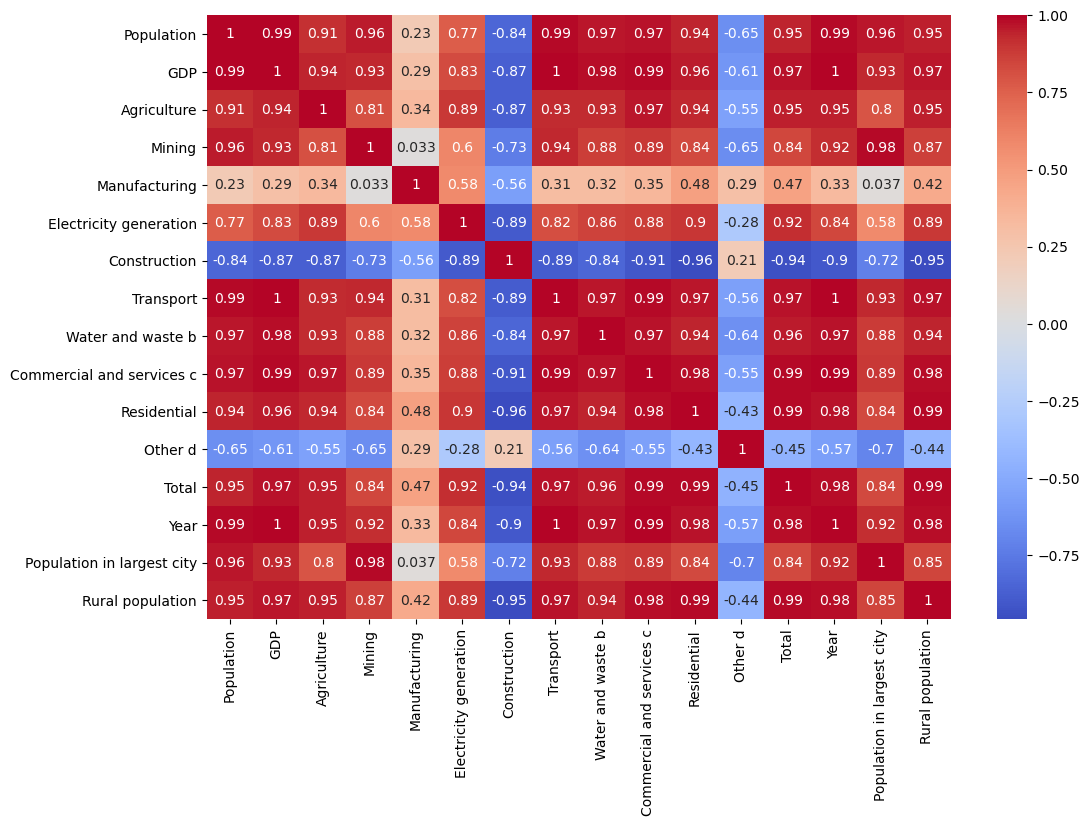

In [7]:
corr = df.corr()

plt.figure(figsize=(12,8), dpi= 100)
sns.heatmap(corr, annot=True, cmap="coolwarm")
plt.show()

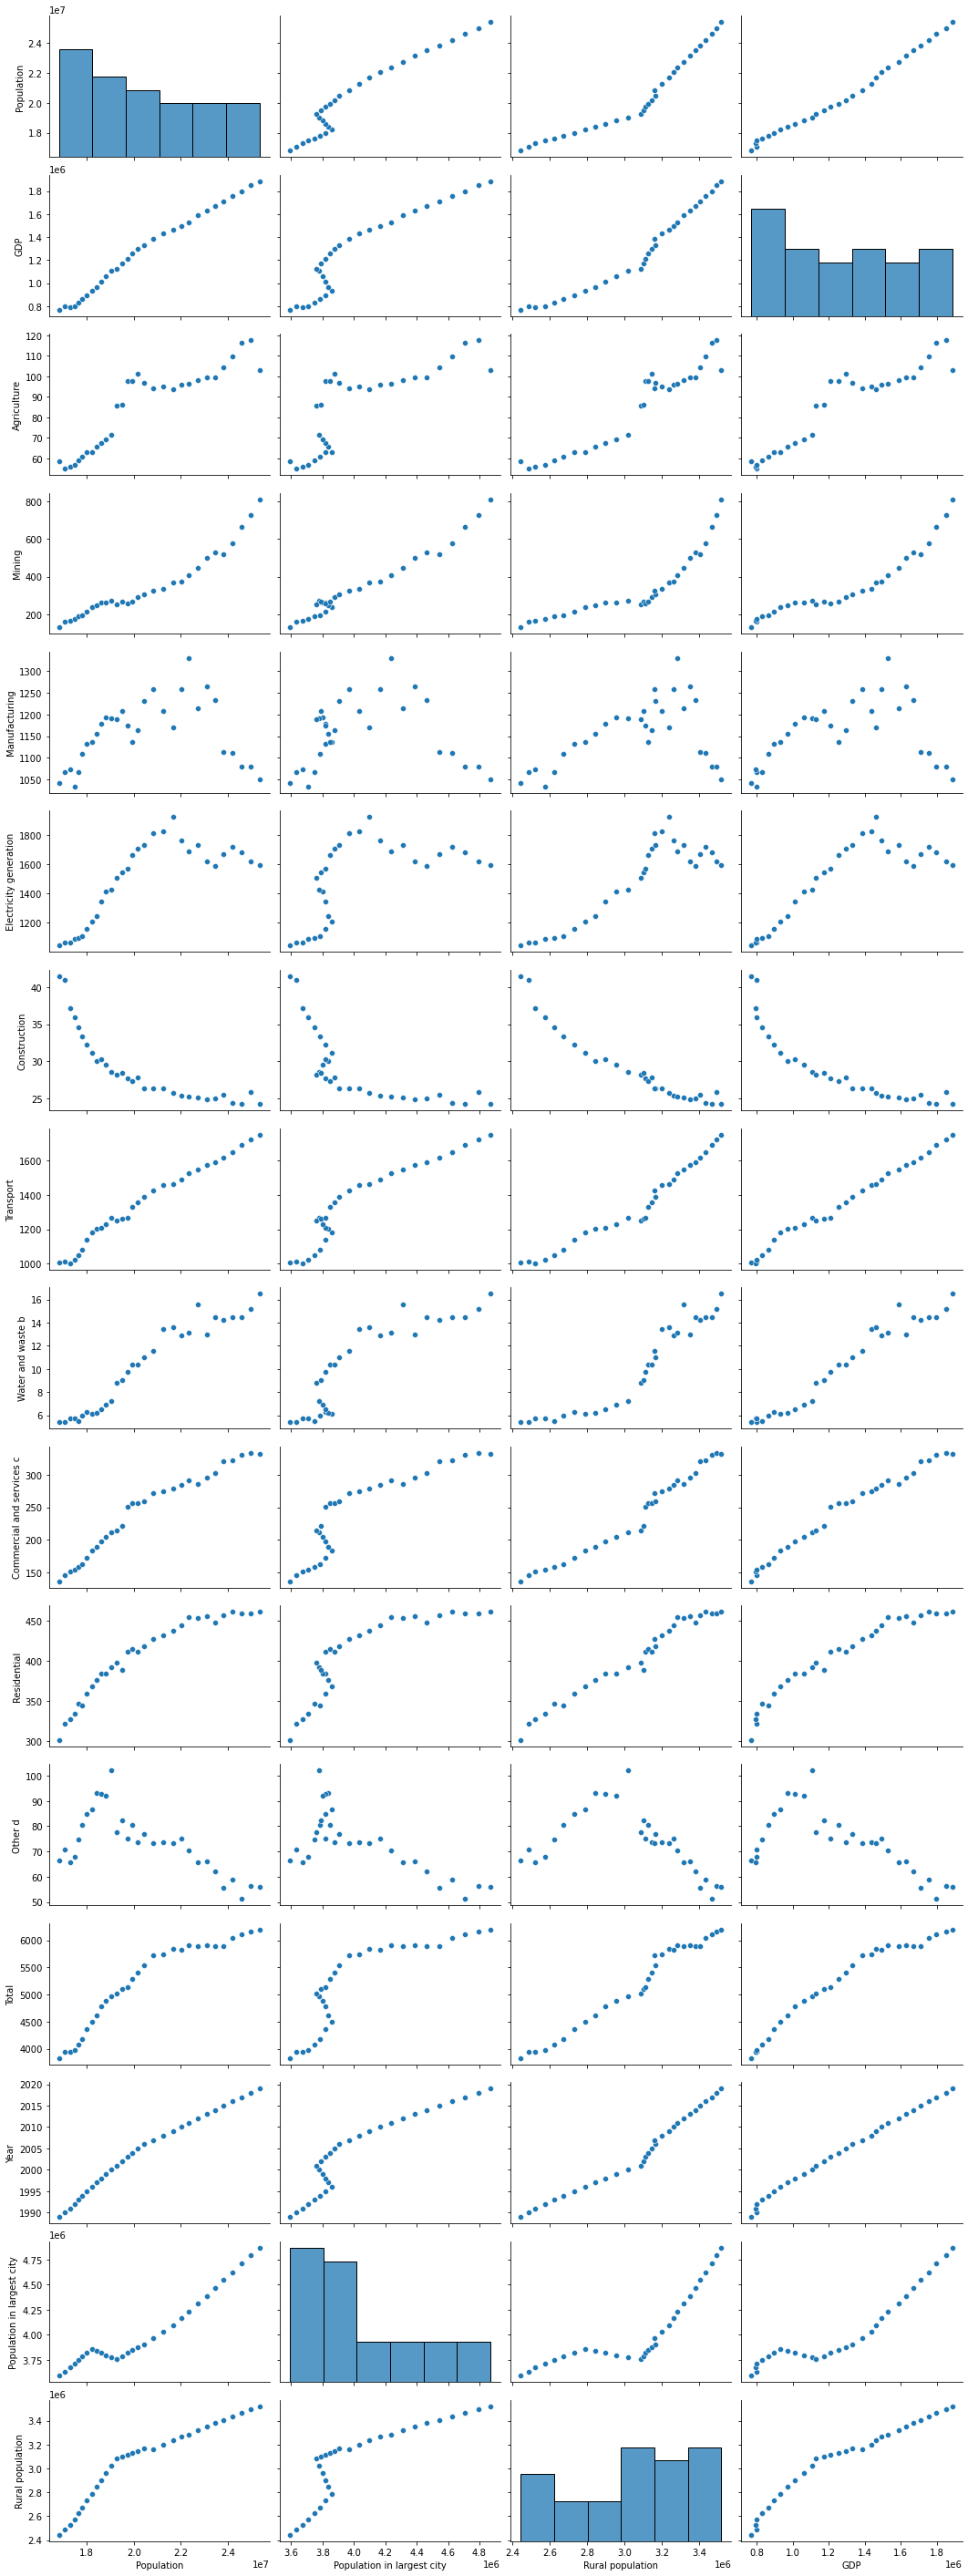

In [8]:
sns.pairplot(data=df, x_vars=["Population", "Population in largest city", "Rural population", "GDP"], aspect=1.5)

## Select features and targets

In [9]:
# Features (Population and GDP)
features = ["Population", "Population in largest city", "Rural population", "GDP"]
X = df[features]

"""Choose one set of targets from below"""

# Targets Option 1 (Energy Consumption of all industries)
targets = ["Agriculture", "Mining", "Manufacturing", "Electricity generation", \
           "Construction", "Transport", "Water and waste b", "Commercial and services c", \
           "Residential", "Other d"]

# Targets Option 2 (Total Energy Consumption)
# targets = ["Total"]

# Targets Option 3 (Energy Consumption of Manufacturing)
# targets = ["Manufacturing"]

# Targets Option 4 (Energy Consumption of Electricity Generation)
# targets = ["Electricity generation"]

# Targets Option 5 (Energy Consumption of Transport)
# targets = ["Transport"]

y = df[targets]

In [10]:
# Standarize features
scaler = StandardScaler()
X = scaler.fit_transform(X)

In [11]:
# Split training and testing data
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=10)

In [12]:
# Train and Test sample size
print("Training size: %d, Testing size: %d" % (X_train.shape[0], X_test.shape[0]))

Training size: 23, Testing size: 8


In [13]:
# True y
y_test

,Agriculture,Mining,Manufacturing,Electricity generation,Construction,Transport,Water and waste b,Commercial and services c,Residential,Other d
20,93.857,369.430,1171.116,1920.660,25.780,1460.138,13.609,278.571,437.417,73.209
7,63.200,237.600,1135.400,1211.800,31.100,1181.500,6.100,183.600,368.400,86.800
5,60.900,194.600,1109.000,1109.600,33.400,1081.000,6.000,162.300,344.400,80.700
2,55.800,164.600,1073.900,1065.000,37.200,1003.000,5.700,151.100,327.800,65.800
3,57.000,176.200,1033.900,1092.900,35.900,1024.300,5.700,154.200,334.600,68.000
21,96.107,372.312,1259.499,1762.468,25.342,1490.824,12.897,284.367,444.253,75.248
13,86.200,268.800,1207.400,1542.900,28.400,1261.100,9.000,221.900,389.000,82.500
27,109.756,575.617,1110.199,1718.262,24.358,1645.504,14.471,322.672,460.903,59.034


## Model 1: Linear Regression

In [14]:
# Create Linear Regression model
lr = LinearRegression().fit(X_train, y_train)

In [15]:
# Calculate score
lr.score(X_test, y_test)

0.8537236953259721

In [16]:
# Prediction
pred_lr = lr.predict(X_test)
df_lr = pd.DataFrame(pred_lr, columns=[targets])

df_lr

,Agriculture,Mining,Manufacturing,Electricity generation,Construction,Transport,Water and waste b,Commercial and services c,Residential,Other d
0,98.573143,356.250470,1247.514332,1691.969477,26.396946,1448.679809,12.924909,276.450477,438.022319,64.719476
1,63.202808,286.509533,1071.307862,1152.785517,32.445941,1159.437610,5.382673,178.206820,357.810342,90.178288
2,58.510074,221.680073,1094.263042,1079.400582,34.817139,1093.731385,5.393226,161.388251,347.078292,81.336787
3,54.618685,137.906331,1116.479568,1034.353386,38.247897,1020.479954,5.699710,144.064645,331.679345,69.378530
4,53.666311,145.560777,1143.559421,994.885835,36.613319,1024.135343,5.583725,144.500634,342.116339,70.866052
5,98.646700,380.850156,1250.279426,1663.641215,26.015381,1466.766891,13.212501,279.700529,442.965799,62.499466
6,85.865913,235.734419,1241.004696,1583.525100,26.532806,1286.506076,9.143748,233.321899,413.418510,85.488313
7,106.441199,629.879810,1135.772174,1654.598958,24.780187,1663.457696,14.824167,319.706724,457.028672,59.819943


## Model 2: Ridge Regression

In [17]:
# Create a range of alphas
alphas = np.logspace(-6, 6, 200)

# Create Ridge model
ridge = RidgeCV(alphas=alphas, cv=5).fit(X_train, y_train)

In [18]:
# Check score
print("Score:", ridge.score(X_test, y_test))

# Check best alpha and coefficient
print("Alpha:", ridge.alpha_)
print("Coefficient:", ridge.coef_)

Score: 0.8944365003220547
Alpha: 0.4055460735840828
Coefficient: [[ 5.33656511e+00 -8.42197666e+00  8.39605341e+00  1.24915337e+01]
 [ 2.41340618e+01  1.38643574e+02  1.01342199e+01 -1.51997170e+00]
 [ 1.86998517e+01 -9.55671054e+01  6.72741894e+01  2.65268573e+01]
 [ 5.52707579e+01 -2.60761419e+02  1.73813586e+02  2.26346000e+02]
 [ 4.14915127e-01  9.20758998e-01 -6.48515490e+00  7.91688038e-01]
 [ 5.33708731e+01  2.93503692e+01  6.29968164e+01  7.94957098e+01]
 [ 1.78779679e+00 -9.10681915e-01 -7.53626062e-02  2.75327763e+00]
 [ 1.59414413e+01 -8.25790283e+00  2.41602112e+01  2.93991511e+01]
 [ 9.41066552e+00 -8.85302847e+00  3.45911084e+01  1.01360150e+01]
 [-1.14458051e+01 -7.81496239e-01  1.72293297e+01 -1.27564472e+01]]


In [19]:
# Prediction
pred_ridge = ridge.predict(X_test)
df_ridge = pd.DataFrame(pred_ridge, columns=[targets])

df_ridge

,Agriculture,Mining,Manufacturing,Electricity generation,Construction,Transport,Water and waste b,Commercial and services c,Residential,Other d
0,98.034927,390.199235,1203.892267,1688.217927,26.269349,1459.919629,12.246384,276.617143,432.486173,71.385968
1,65.521620,252.666788,1106.307171,1196.734716,33.127463,1157.605378,6.360631,181.510858,360.986399,82.251000
2,60.874388,216.814944,1093.044261,1133.589710,35.095075,1104.304174,5.747981,166.030249,346.608426,80.445618
3,55.888827,165.640786,1080.849595,1073.973097,37.658249,1039.103469,5.154197,148.035837,328.940350,77.331488
4,56.939570,182.907092,1083.951498,1082.617053,36.734778,1057.077122,5.213452,152.632226,334.494700,79.062028
5,98.917799,419.721872,1196.216474,1680.367668,26.059727,1484.213751,12.547881,281.626705,435.663111,69.953126
6,86.595031,247.764416,1217.834984,1599.437177,27.328381,1295.326525,9.239437,234.963581,408.312699,84.872750
7,106.648305,620.338922,1146.948408,1659.861583,24.680659,1660.209268,14.931620,319.720616,458.632807,58.979514


## Model 3: SVR

In [20]:
# Create SVR model for each target and find score
def svr(X_train, X_test, y_train, y_test, targets, kernel):
    
    # Create a list for score and prediction
    score_svr = []
    pred_svr = []
    
    # SVR does not support multiple targets, so calculate scores by a for-loop
    for target in range(len(targets)):
        svr = SVR(kernel=kernel).fit(X_train, y_train.iloc[:,target])
        score_svr.append(svr.score(X_test, y_test.iloc[:,target]))
        pred_svr.append(svr.predict(X_test))
    
    # Prediction table
    df_svr = pd.DataFrame(np.transpose(pred_svr), columns=[targets])
    
    return np.mean(score_svr), df_svr

In [21]:
# Compare scores between three different kernels
print("Score of rbf: {}".format(svr(X_train, X_test, y_train, y_test, targets, "rbf")[0]))
print("Score of linear: {}".format(svr(X_train, X_test, y_train, y_test, targets, "linear")[0]))
print("Score of poly: {}".format(svr(X_train, X_test, y_train, y_test, targets, "poly")[0]))

Score of rbf: 0.11972393600037676
Score of linear: 0.5457816403284979
Score of poly: 0.3210509856236868


In [22]:
# Table of prediction with linear kernel
df_svr = svr(X_train, X_test, y_train, y_test, targets, "linear")[1]

df_svr

,Agriculture,Mining,Manufacturing,Electricity generation,Construction,Transport,Water and waste b,Commercial and services c,Residential,Other d
0,92.755901,336.609014,1177.848024,1572.693906,26.121191,1395.460755,12.047700,271.713330,424.683073,70.315662
1,70.258359,251.012859,1167.171256,1519.632536,31.832617,1302.868204,6.752175,212.702486,380.172054,80.009666
2,66.205609,235.185242,1165.184878,1509.927005,32.923306,1285.812724,6.073450,201.857522,372.074317,81.684051
3,61.234791,215.175607,1162.831019,1497.841107,34.222982,1264.305962,5.341263,188.298552,362.055655,83.837335
4,62.656754,221.060379,1163.516827,1501.355918,33.840078,1270.610984,5.476751,192.255690,364.956544,83.221642
5,94.439327,345.129162,1178.181138,1577.271413,25.946472,1404.506382,12.356956,276.990268,428.277540,69.066297
6,81.267085,283.982452,1174.599993,1543.090252,27.809058,1339.206399,9.335448,238.019029,400.899974,77.713364
7,106.570944,405.219547,1180.786287,1609.860114,24.577210,1468.393382,14.736019,314.465838,453.982106,60.339341


## Compare testing data and predictions

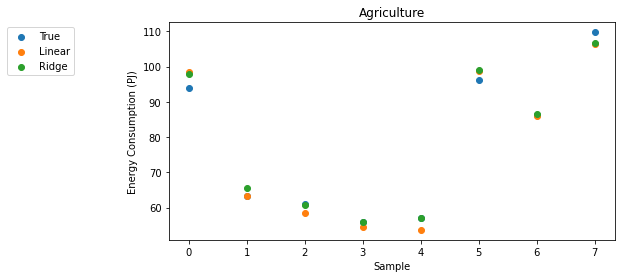

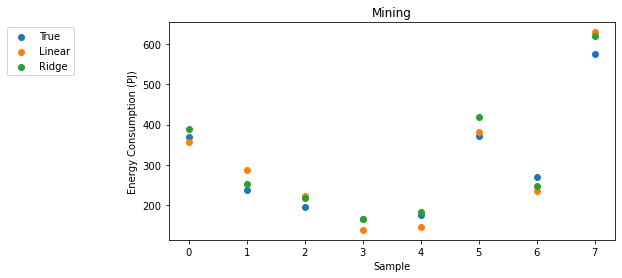

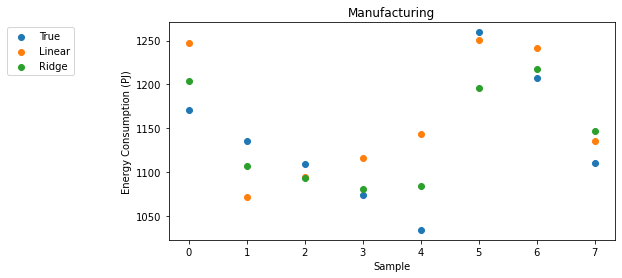

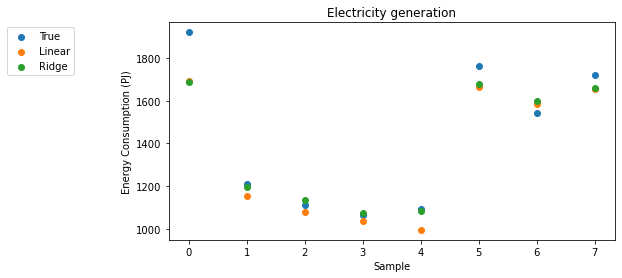

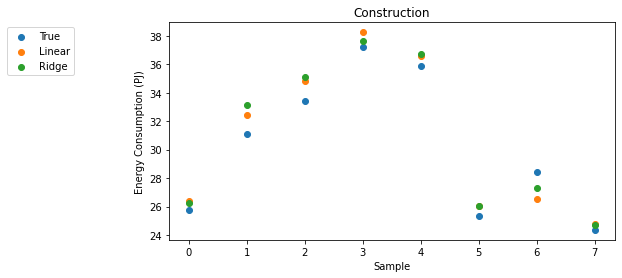

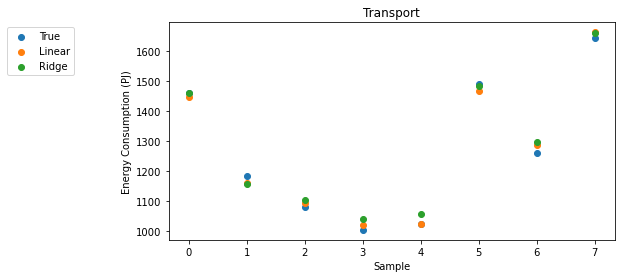

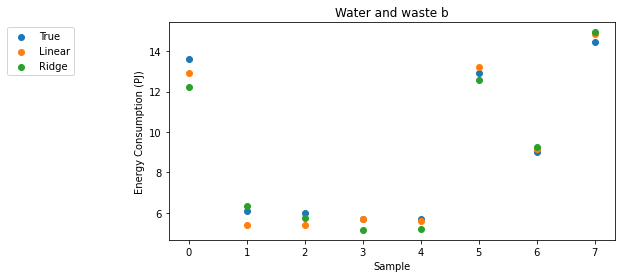

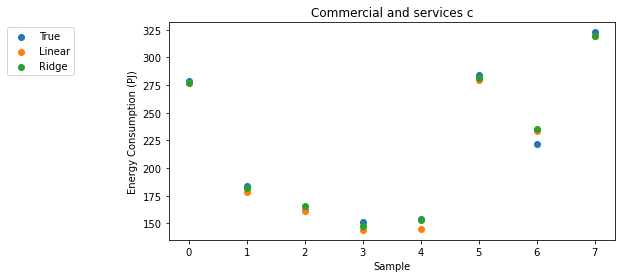

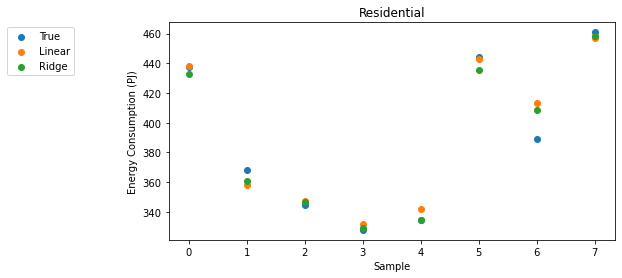

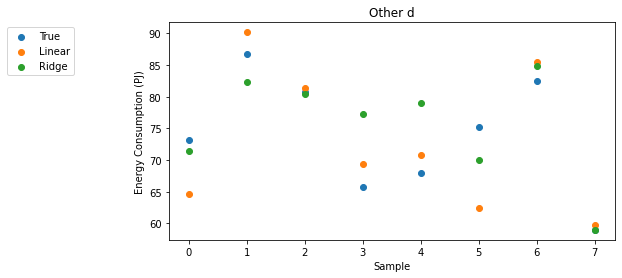

In [23]:
for col in y_test.columns:
    plt.figure(figsize=(8,4))
    plt.title(col)
    plt.scatter(range(len(y_test)), y_test[col])
    plt.scatter(range(len(y_test)), df_lr[col])
    plt.scatter(range(len(y_test)), df_ridge[col])
    plt.xlabel("Sample")
    plt.ylabel("Energy Consumption (PJ)")
    plt.legend(["True", "Linear", "Ridge"], bbox_to_anchor=(-0.2,1))
    plt.show()